# 1. Importing the data

In [1]:
# import packages
import pandas as pd
import numpy as np

In [2]:
# load data from local
df = pd.read_csv(r'/Users/meow/Downloads/world_energy_consumption.csv')
# read a few lines of the data
df.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# show (rows, columns) of the table
df.shape

(17432, 122)

# 2. Data cleaning

In [4]:
# count nulls in the dataset
nulls = df.isna().sum()
nulls

iso_code                   1802
country                       0
year                          0
coal_prod_change_pct       9987
coal_prod_change_twh       7038
                          ...  
wind_share_energy         13148
wind_cons_change_twh      13225
wind_consumption          13142
wind_elec_per_capita      11933
wind_energy_per_capita    13142
Length: 122, dtype: int64

## After quickly checking the data, many nulls are found. Need to fill the nulls with values.

In [5]:
# since there are many nulls in the dataset, they need to be filled
# does not make sense to fill the nulls with 0, so ffill and bfill are used 

nulls = df.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        df[i].ffill(inplace=True) #ffill - forward fill (fill with the previous data)
        df[i].bfill(inplace=True) #bfill - backward fill (if there is no forward value, fill with the backward value)

In [6]:
# count nulls in the dataset after cleaning up!
nulls = df.isna().sum()
nulls

iso_code                  0
country                   0
year                      0
coal_prod_change_pct      0
coal_prod_change_twh      0
                         ..
wind_share_energy         0
wind_cons_change_twh      0
wind_consumption          0
wind_elec_per_capita      0
wind_energy_per_capita    0
Length: 122, dtype: int64

## No nulls anymore!

# 3. Data selection
## The first two plots focus on the percentages of different kinds of electricity sources in 1990 and 2020 in the US.

In [7]:
# filter the columns
df = df[[
    'country', 'year', 'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 
    'hydro_electricity', 'nuclear_electricity','oil_electricity', 'other_renewable_electricity','renewables_electricity'
]]

df.head()

,country,year,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,renewables_electricity
0,Afghanistan,1900,0.0,0.0,0.155,0.155,0.312,0.0,0.0,0.0,0.312
1,Afghanistan,1901,0.0,0.0,0.155,0.155,0.312,0.0,0.0,0.0,0.312
2,Afghanistan,1902,0.0,0.0,0.155,0.155,0.312,0.0,0.0,0.0,0.312
3,Afghanistan,1903,0.0,0.0,0.155,0.155,0.312,0.0,0.0,0.0,0.312
4,Afghanistan,1904,0.0,0.0,0.155,0.155,0.312,0.0,0.0,0.0,0.312


In [8]:
# filter the years
df = df[df['year'] >= 1990]

df.head()

,country,year,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,renewables_electricity
90,Afghanistan,1990,0.0,0.0,0.155,0.155,0.312,0.0,0.0,0.0,0.312
91,Afghanistan,1991,0.0,0.0,0.155,0.155,0.312,0.0,0.0,0.0,0.312
92,Afghanistan,1992,0.0,0.0,0.155,0.155,0.312,0.0,0.0,0.0,0.312
93,Afghanistan,1993,0.0,0.0,0.155,0.155,0.312,0.0,0.0,0.0,0.312
94,Afghanistan,1994,0.0,0.0,0.155,0.155,0.312,0.0,0.0,0.0,0.312


In [9]:
# filter the countries 
countries = ['United States']
df = df.loc[df['country'].isin(countries)]

df.head()

,country,year,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,renewables_electricity
16339,United States,1990,35.468,1725.155,2261.957,400.823,292.281,607.223,135.979,57.459,352.928
16340,United States,1991,35.468,1722.536,2261.573,410.272,287.326,644.805,128.765,60.552,351.337
16341,United States,1992,35.468,1757.501,2299.683,434.489,251.426,651.343,107.693,64.815,319.567
16342,United States,1993,35.468,1831.211,2398.646,446.158,279.251,642.412,121.278,66.925,349.687
16343,United States,1994,35.468,1832.272,2441.003,494.859,259.341,674.147,113.872,66.355,329.680


# 4. Color selection

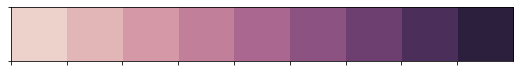

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# choose the color scheme. seaborn provides a variety of beautiful color schemes
sns.palplot(sns.cubehelix_palette(9))
plt.show()

# 5. Plotting pie charts

In [11]:
# calculate the percentage shares of electricty from total

Parse=[
    'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 
    'hydro_electricity', 'nuclear_electricity','oil_electricity', 'other_renewable_electricity','renewables_electricity'
]
df['total'] = df[Parse].sum(axis=1)
df_electricity=df[['year','country']]
for i in Parse:
    df_electricity[f"{i}%"]=round(100*(df[i]/df['total']),4)
   
df_electricity.head()

/Users/meow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,year,country,biofuel_electricity%,coal_electricity%,fossil_electricity%,gas_electricity%,hydro_electricity%,nuclear_electricity%,oil_electricity%,other_renewable_electricity%,renewables_electricity%
16339,1990,United States,0.6043,29.3930,38.5390,6.8292,4.9799,10.3458,2.3168,0.9790,6.0131
16340,1991,United States,0.6009,29.1825,38.3146,6.9507,4.8678,10.9240,2.1815,1.0258,5.9522
16341,1992,United States,0.5989,29.6776,38.8330,7.3369,4.2456,10.9987,1.8185,1.0945,5.3963
16342,1993,United States,0.5747,29.6743,38.8694,7.2299,4.5252,10.4101,1.9653,1.0845,5.6666
16343,1994,United States,0.5678,29.3304,39.0748,7.9216,4.1515,10.7915,1.8228,1.0622,5.2774


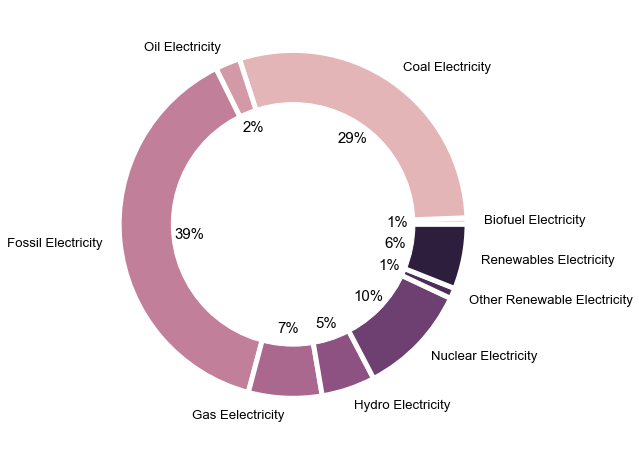

In [12]:
# for 1990

sns.set(rc={'figure.figsize':(8,8)}) # Set figure size 
sns.set(font_scale = 1.2)

data = [0.6043, 29.3930, 2.3168, 38.5390, 6.8292, 4.9799, 10.3458, 0.9790, 6.0131]
labels = [
    'Biofuel Electricity', 'Coal Electricity', 'Oil Electricity', 'Fossil Electricity', 'Gas Eelectricity', 'Hydro Electricity', 
    'Nuclear Electricity', 'Other Renewable Electricity', 'Renewables Electricity'
]

inner_circle = plt.Circle( (0,0), 0.7, color='white')

plt.rcParams['axes.labelsize'] = 5
plt.rcParams['text.color'] = 'black'
plt.rcParams['font.size'] = 15
colors = sns.cubehelix_palette(9)

plt.pie(data, labels = labels, colors = colors, autopct = '%0.0f%%', 
        wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }
       )

p = plt.gcf()
p.gca().add_artist(inner_circle)

plt.show()

## The plot above is the electricity distribution of the US in 1990.

In [13]:
print(df_electricity)

       year        country  biofuel_electricity%  coal_electricity%  \
16339  1990  United States                0.6043            29.3930   
16340  1991  United States                0.6009            29.1825   
16341  1992  United States                0.5989            29.6776   
16342  1993  United States                0.5747            29.6743   
16343  1994  United States                0.5678            29.3304   
16344  1995  United States                0.5516            28.8176   
16345  1996  United States                0.5358            29.3944   
16346  1997  United States                0.5238            29.5112   
16347  1998  United States                0.5066            28.9814   
16348  1999  United States                0.4996            28.7046   
16349  2000  United States                0.8795            28.4761   
16350  2001  United States                0.7373            28.2196   
16351  2002  United States                0.7695            27.6967   
16352 

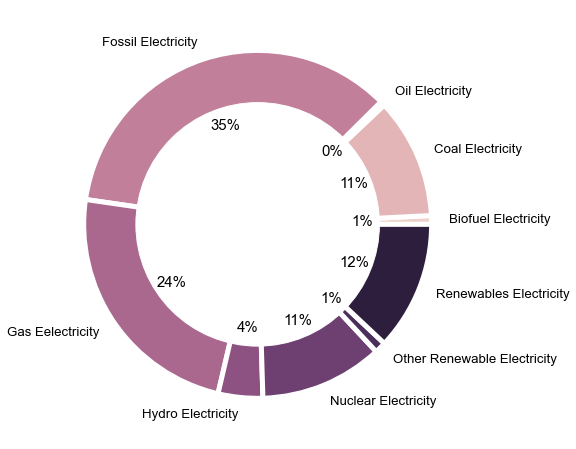

In [14]:
# for 2020

sns.set(rc={'figure.figsize':(8,8)}) # Set figure size 
sns.set(font_scale = 1.2)

data = [0.8128, 11.2200, 0.4197, 35.2633, 23.6235, 4.1439, 11.4536, 1.0583, 12.0049]
labels = [
    'Biofuel Electricity', 'Coal Electricity', 'Oil Electricity', 'Fossil Electricity', 'Gas Eelectricity', 'Hydro Electricity', 
     'Nuclear Electricity', 'Other Renewable Electricity', 'Renewables Electricity'
]

inner_circle = plt.Circle( (0,0), 0.7, color='white')

plt.rcParams['axes.labelsize'] = 5
plt.rcParams['text.color'] = 'black'
plt.rcParams['font.size'] = 15
colors = sns.cubehelix_palette(9)

plt.pie(data, labels = labels, colors = colors, autopct = '%0.0f%%', 
        wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }
       )

p = plt.gcf()
p.gca().add_artist(inner_circle)

plt.show()

## The plot above is the electricity distribution of the US in 2020.

# ---
# Now it's time to explore the data where country = 'Germany'
# ---

# 1. Loading data, cleaning and selection

In [15]:
df = pd.read_csv(r'/Users/meow/Downloads/world_energy_consumption.csv')

nulls = df.isna().sum()
nulls

iso_code                   1802
country                       0
year                          0
coal_prod_change_pct       9987
coal_prod_change_twh       7038
                          ...  
wind_share_energy         13148
wind_cons_change_twh      13225
wind_consumption          13142
wind_elec_per_capita      11933
wind_energy_per_capita    13142
Length: 122, dtype: int64

In [16]:
nulls = df.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        df[i].ffill(inplace=True)
        df[i].bfill(inplace=True)

nulls = df.isna().sum()
nulls

iso_code                  0
country                   0
year                      0
coal_prod_change_pct      0
coal_prod_change_twh      0
                         ..
wind_share_energy         0
wind_cons_change_twh      0
wind_consumption          0
wind_elec_per_capita      0
wind_energy_per_capita    0
Length: 122, dtype: int64

In [17]:
df = df[[
    'country', 'year', 'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 
    'hydro_electricity', 'nuclear_electricity','oil_electricity', 
    'other_renewable_electricity','renewables_electricity'
]]

df = df[df['year'] >= 1990]

countries = ['Germany']
df = df.loc[df['country'].isin(countries)]

df.head()

,country,year,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,renewables_electricity
6104,Germany,1990,0.0,311.7,358.4,35.9,17.335,152.5,10.8,1.435,18.842
6105,Germany,1991,0.0,308.1,359.2,36.3,15.850,147.4,14.8,1.471,17.422
6106,Germany,1992,0.0,296.4,342.6,33.0,18.635,158.8,13.2,1.558,20.472
6107,Germany,1993,0.0,293.7,336.6,32.8,18.960,153.5,10.1,1.635,21.198
6108,Germany,1994,0.0,290.7,336.9,36.1,20.195,151.2,10.1,1.875,22.986


# 2. Selecting a new color scheme and plot!

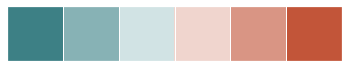

In [18]:
sns.palplot(sns.diverging_palette(200, 20))
plt.show()

In [19]:
Parse=[
    'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 
    'hydro_electricity', 'nuclear_electricity','oil_electricity',
    'other_renewable_electricity','renewables_electricity'
]
df['total'] = df[Parse].sum(axis=1)
df_electricity=df[['year','country']]
for i in Parse:
    df_electricity[f"{i}%"]=round(100*(df[i]/df['total']),4)
   
df_electricity.head()

/Users/meow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,year,country,biofuel_electricity%,coal_electricity%,fossil_electricity%,gas_electricity%,hydro_electricity%,nuclear_electricity%,oil_electricity%,other_renewable_electricity%,renewables_electricity%
6104,1990,Germany,0.0,34.3694,39.5187,3.9585,1.9114,16.8153,1.1909,0.1582,2.0776
6105,1991,Germany,0.0,34.2127,39.8870,4.0309,1.7600,16.3679,1.6435,0.1633,1.9346
6106,1992,Germany,0.0,33.5042,38.7265,3.7302,2.1064,17.9503,1.4921,0.1761,2.3141
6107,1993,Germany,0.0,33.8172,38.7568,3.7767,2.1831,17.6743,1.1629,0.1883,2.4408
6108,1994,Germany,0.0,33.4116,38.7216,4.1492,2.3211,17.3782,1.1608,0.2155,2.6419


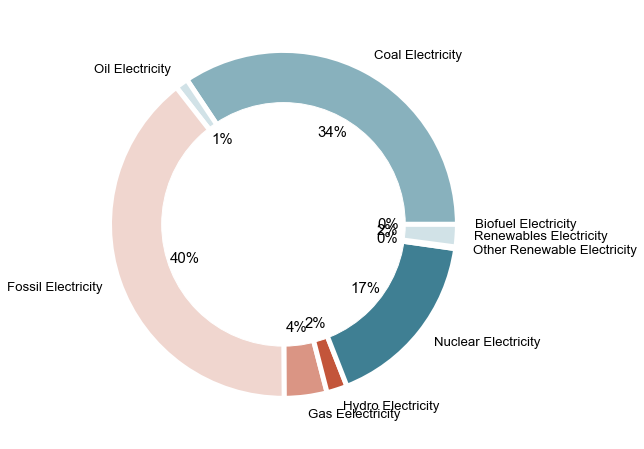

In [20]:
# for 1990

sns.set(rc={'figure.figsize':(8,8)})
sns.set(font_scale = 1.2)

data = [0.0, 34.3694, 1.1909, 39.5187, 3.9585, 1.9114, 16.8153, 0.1582, 2.0776]
labels = [
    'Biofuel Electricity', 'Coal Electricity', 'Oil Electricity', 'Fossil Electricity', 
    'Gas Eelectricity', 'Hydro Electricity', 
    'Nuclear Electricity', 'Other Renewable Electricity', 'Renewables Electricity'
]

inner_circle = plt.Circle( (0,0), 0.7, color='white')

plt.rcParams['axes.labelsize'] = 5
plt.rcParams['text.color'] = 'black'
plt.rcParams['font.size'] = 15
colors = sns.diverging_palette(220, 20)

plt.pie(data, labels = labels, colors = colors, autopct = '%0.0f%%', 
        wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }
       )

p = plt.gcf()
p.gca().add_artist(inner_circle)

plt.show()

## The plot above is the electricity distribution of Germany in 1990.

In [21]:
print(df_electricity)

      year  country  biofuel_electricity%  coal_electricity%  \
6104  1990  Germany                0.0000            34.3694   
6105  1991  Germany                0.0000            34.2127   
6106  1992  Germany                0.0000            33.5042   
6107  1993  Germany                0.0000            33.8172   
6108  1994  Germany                0.0000            33.4116   
6109  1995  Germany                0.0000            32.8257   
6110  1996  Germany                0.0000            32.7468   
6111  1997  Germany                0.0000            31.7738   
6112  1998  Germany                0.0000            32.1361   
6113  1999  Germany                0.0000            31.0614   
6114  2000  Germany                0.3512            30.0990   
6115  2001  Germany                0.5267            29.6972   
6116  2002  Germany                0.6469            29.5735   
6117  2003  Germany                0.8620            29.5109   
6118  2004  Germany                1.028

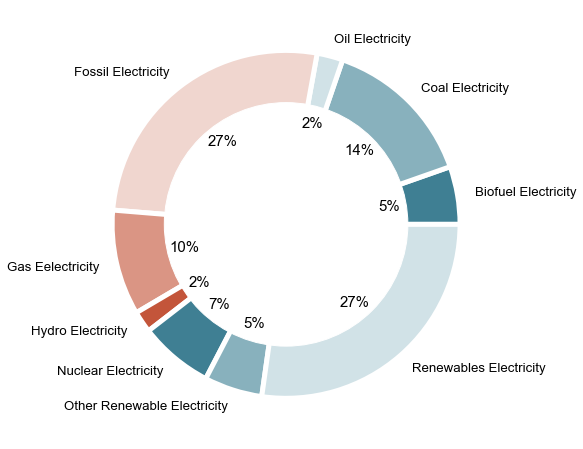

In [22]:
# for 2020

sns.set(rc={'figure.figsize':(8,8)}) # Set figure size 
sns.set(font_scale = 1.2)

data = [5.3791, 14.3514, 2.4062, 26.5533, 9.7957, 1.9998, 6.8763, 5.4005, 27.2377]
labels = [
    'Biofuel Electricity', 'Coal Electricity', 'Oil Electricity', 'Fossil Electricity', 
    'Gas Eelectricity', 'Hydro Electricity', 
    'Nuclear Electricity', 'Other Renewable Electricity', 'Renewables Electricity'
]

inner_circle = plt.Circle( (0,0), 0.7, color='white')

plt.rcParams['axes.labelsize'] = 5
plt.rcParams['text.color'] = 'black'
plt.rcParams['font.size'] = 15
colors = sns.diverging_palette(220, 20)

plt.pie(data, labels = labels, colors = colors, autopct = '%0.0f%%', 
        wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' }
       )

p = plt.gcf()
p.gca().add_artist(inner_circle)

plt.show()

## The plot above is the electricity distribution of Germany in 2020.

## The increase of the renewable electricity over the years is interesting. A line plot can help visually.

In [23]:
df_renew = df_electricity[['year', 'renewables_electricity%']]

df_renew.head()

,year,renewables_electricity%
6104,1990,2.0776
6105,1991,1.9346
6106,1992,2.3141
6107,1993,2.4408
6108,1994,2.6419


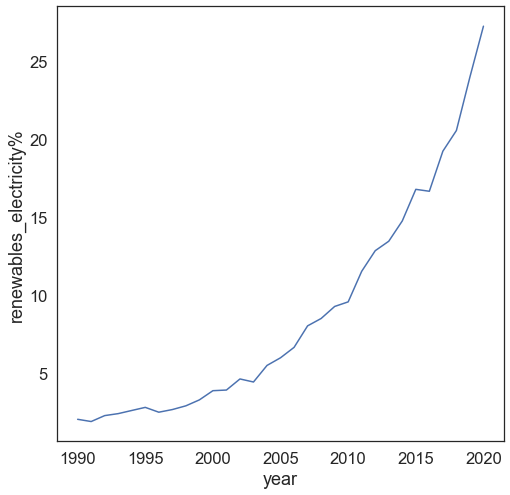

In [28]:
sns.set_style("white")

# create line plot
sns.lineplot(data = df_renew, x = 'year', y = 'renewables_electricity%')

plt.show()